Notebook to compute the correlation scores between different signatures and our own data as shown in Figure S2.

In [2]:
library(tidyverse)
library(Seurat)
library(patchwork)
library(corrplot)
library(ComplexHeatmap)

corrplot 0.92 loaded

Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [3]:
#Define input directory

    data_dir <- "../ZenodoRepo/"

In [5]:
#Load full object from data repo:

    INTepi <- readRDS(paste0(data_dir,"INTepi.rds"))
    INTepi

An object of class Seurat 
84714 features across 29452 samples within 4 assays 
Active assay: RNA (27434 features, 0 variable features)
 3 other assays present: SCT, integrated, UCellRanks
 7 dimensional reductions calculated: pca, umap, phate, pca_epi, umap_epi, phate_epi, phate_epi2

#Load subsampled object

    downsampled_INTepi <- readRDS("data/downsampled_INTepi.rds")

# Defining the literature signatures

In the cases where the genes present belonged to a different organism other than M. musculus (i.e. Human data) we used biomart to find the relevant orthologs

#Data used came straight from other publications supplementary materials or was manually captured from their analyses

    #From datasets
    d41598_2018_37301_MOESM2_ESM8 <- read_csv("data/published_signatures/41598_2018_37301_MOESM2_ESM8.csv")
    d1_s2_0_S193459091100110X_mmc47 <- read_csv("data/published_signatures/1-s2.0-S193459091100110X-mmc47.csv", skip = 4)
    d1_s2_0_S193459091100110X_mmc26_LGR5 <- read_csv("data/published_signatures/1-s2.0-S193459091100110X-mmc26__LGR5.csv",
                                                    skip = 4)
    d1_s2_0_S193459091100110X_mmc26_Prolif <- read_csv("data/published_signatures/1-s2.0-S193459091100110X-mmc26__Prolif.csv", 
                                                    skip = 4)
    d1_s2_0_S193459091100110X_mmc26_ISC <- read_csv("data/published_signatures/1-s2.0-S193459091100110X-mmc26__ISC.csv",
                                                    skip = 4)
    d41586_2015_BFnature15382_MOESM27_ESM5 <- read_csv("data/published_signatures/41586_2015_BFnature15382_MOESM27_ESM5.csv")
    d41592_2021_1391_MOESM7_ESM4 <- read_csv("data/published_signatures/41592_2021_1391_MOESM7_ESM4.csv")
    d1_s2_0_S1934590917304538_mmc21 <- read_csv("data/published_signatures/1-s2.0-S1934590917304538-mmc21.csv",
                                                skip = 3)
    d41586_2019_1154_MOESM6_ESM3_SSC2c <- read_csv("data/published_signatures/41586_2019_1154_MOESM6_ESM3__SSC2c.csv")
    d41586_2019_1154_MOESM6_ESM3_SSC2b <- read_csv("data/published_signatures/41586_2019_1154_MOESM6_ESM3__SSC2b.csv")
    d41586_2019_1154_MOESM6_ESM3_SSC2a <- read_csv("data/published_signatures/41586_2019_1154_MOESM6_ESM3__SSC2a.csv")
    d41586_2019_1154_MOESM4_ESM2_clust18SSC2 <- read_csv("data/published_signatures/41586_2019_1154_MOESM4_ESM2__clust18SSC2.csv")
    d41586_2019_1154_MOESM4_ESM2_clust17SSC1 <- read_csv("data/published_signatures/41586_2019_1154_MOESM4_ESM2__clust17SSC1.csv")
    d41588_2017_BFng3818_MOESM20_ESM2_stemTA <- read_csv("data/published_signatures/41588_2017_BFng3818_MOESM20_ESM2_stemTA.csv")
    d41588_2017_BFng3818_MOESM21_ESM1_DEtumour <- read_csv("data/published_signatures/41588_2017_BFng3818_MOESM21_ESM1_DEtumour.csv")
    d1_s2_0_S0092867421009454_mmc43_stemTA <- read_csv("data/published_signatures/1-s2.0-S0092867421009454-mmc43_stemTA.csv")
    d43018_2022_402_MOESM2_ESM_MEX3A <- read_csv("data/published_signatures/43018_2022_402_MOESM2_ESM.csv", skip=2)
    d41586_2022_5402_MOESM9_ESM <- read_csv("data/published_signatures/41586_2022_5402_MOESM9_ESM.csv", skip = 1)

    #Manual signatures from literature
    g_FetalHAN20 <- c("Sprr1a", "Msln","Ly6a","Spp1", "Krt4")
    g_RevscHAN20 <- c("Cxadr","Basp1","Anxa1","Clu")
    g_IscHAN20 <- c("Gkn3","Ascl2","Axin2","Olfm4","Lgr5")
    g_YapHAN20 <- c("Ankrd1", "Ccn1","Ccn2","Axl","Msln","Plaur")
    g_WntHAN20 <- c("Axin2","Apcdd1","Nkd1","Tnfrsf19","Smoc2","Cd44","Wnt6")
    g_IscGREGORIEFF15 <- c("Lgr5","Aqp4","Axin2","Ephb3","Sox9","Sox4","Defa5","Wnt3","Spdef","Atoh1")#Atoh1 is Math1
    g_IscGREGORIEFF15 <- c("Lgr5","Aqp4","Axin2","Ephb3","Sox9","Sox4","Wnt3","Spdef","Atoh1")#Defa5 isn't present
    g_RepGREGORIEFF15 <- c("Clu","Areg","Cxcl16","Il13","Ly6a","Tnfrsf12a", "Il1rn","Hbegf","Msln")#Tnfrsf12a is tweakR proper name in mouse
    g_RepGREGORIEFF15 <- c("Clu","Areg","Cxcl16","Ly6a","Tnfrsf12a", "Il1rn","Hbegf","Msln")#Il13 isn't present
    g_IscLI17 <- c("EPHB2", "SOX9", "ASCL2", "OLFM4", "CD44", "PROM1", "PTK7", 
                "LGR5", "LATS2", "CXCL2", "MLLT10", "METTL3", "EZH2", "VEGFA", 
                "EGFR","GPSM2", "DNMT3A", "HES1", "MYC", "RNF43", "AXIN2", "CDK6",
                "PTPR0", "RGMB", "CDCA7", "AQP1", "PTPLAD1", "DPP4", "CFTR", 
                "TSPAN6", "FERMT1", "UGT8", "LRIG1", "CA2", "STMN1", "BMI1", 
                "SMOC2", "ETS2", "GPX2", "FAM84A", "PTPRG", "SLC12A2")
    g_StemcorrLI17 <- c("H2AFZ","SRSF2","SMG1","STMN1","GPX2","TUBB4B","RPL14","CTD-2031P19.4")
    g_TumourLI17 <- c("HSPA8", "HSP90AA1", "HSPH1", "LYZ", "RP11-1143G9.4", "SAT1",
                    "ANKRD10", "HNRNPH1", "S100A11", "S100P")
    g_WntLI17 <- c("WNT3", "FZD3", "APC", "CTNNB1", "TCF7", "LEF1", "AXIN2",
                "AXIN1", "LGR5", "MYC", "CCND1", "BIRC5", "ASCL2", "MMP7",
                "VEGFA", "RNF43", "GPX2", "OLFM4")
    g_TgfbLI17 <- c("PMEPA1", "TGIF1", "LAMC2", "ITGA2", "EPHB2", "CKS2", "CENPF",
                    "CDC42SE1", "BIRC5", "BHLHE40", "BARD1", "ASPM", "VEGFB", 
                    "VEGFA", "IGFBP31", "CDH11", "INHBA", "TAGLN", "CTGF", "ACTA2",
                    "COL18A1", "COL6A3", "COL1A2", "COL1A1", "MMP2", "TIMP1",
                    "PLAUR", "IFNG", "ADAM19", "IL1RN", "IL1A", "CSF1R", "HSPG2",
                    "SERPINE1", "TGFB3")
    g_ProgenstemDALERBA11 <- c("LGR5", "ASCL2", "RGMB", "PTPR0")
    g_ImmatureDALERBA11 <- c("OLFM4", "LRIG1", "CFTR", "TSPAN6", "AQP1")
    g_CancerDALERBA11 <- c("MYC", "AXIN2", "EZH2")
    g_ProlifDALERBA11 <- c("MKI67", "TOP2A", "BIRC5")

    #This publication's curated signatures
    g_OWNsig_CSC <- c("Lgr5", "Pla2g2a", "Lrig1", "Smoc2", "Aqp5", "Agr2")
    g_OWNsig_proCSC <- c("Cenpa", "Hmgb2", "Birc5", "Tuba1b", "Ube2c", "Rrm2", 
                        "Hells", "Cdk1", "Ephb2")
    g_OWNsig_revCSC <- c("Anxa1", "Ly6a", "Clu", "Basp1",  # Revival stem 
                        "Areg", "Ccn1", "Ccn2", "Ankrd1",  # YAP Targets
                        "Ctla2a", "Pmepa1", "Marcksl1", "Cldn4", "F3", "Ecm1", 
                        "Sox9", "Cd44", "Itga2", "Fn1") # Broader )
    g_OWNsig_proliferation <- c("Stmn1", "Ccnd1", "Mki67", "Ccnb1")
    #DE genes from this publication's clusters
    g_OWNdeclust_CSC <- FindMarkers(INTepi21_velo, assay = "RNA",
                        group.by = "curatedCLUST", ident.1 = "Stem",
                        test.use = "wilcox", min.pct = 0.1, only.pos = FALSE,
                        random.seed = 12,
                        verbose = TRUE
                        )
    g_OWNdeclust_stem <- g_OWNdeclust_stem %>%
                            filter(p_val_adj < 0.01 & avg_log2FC>0.25) %>% 
                            slice_max(avg_log2FC, n=24)
    g_OWNdeclust_stem <- rownames(g_OWNdeclust_stem)
    g_OWNdeclust_stemO <- FindMarkers(INTepi21_velo, assay = "RNA",
                            group.by = "curatedCLUST", ident.1 = "Stem (Oncogene)",
                            test.use = "wilcox", min.pct = 0.1, only.pos = FALSE,
                            random.seed = 12,
                            verbose = TRUE
                        )
    g_OWNdeclust_stemO <- g_OWNdeclust_stemO %>%
                            filter(p_val_adj < 0.01 & avg_log2FC>0.25) %>% 
                            slice_max(avg_log2FC, n=24)
    g_OWNdeclust_stemO <- rownames(g_OWNdeclust_stemO)
    g_OWNdeclust_stemS <- FindMarkers(INTepi21_velo, assay = "RNA",
                            group.by = "curatedCLUST", ident.1 = "Stem (Stroma)",
                            test.use = "wilcox", min.pct = 0.1, only.pos = FALSE,
                            random.seed = 12,
                            verbose = TRUE
                        )
    g_OWNdeclust_stemS <- g_OWNdeclust_stemS %>%
                            filter(p_val_adj < 0.01 & avg_log2FC>0.25) %>% 
                            slice_max(avg_log2FC, n=24)
    g_OWNdeclust_stemS <- rownames(g_OWNdeclust_stemS)

Then, for each signture/set of signatures, we used UCell's AddModuleScore function (with default parameters) to compute a per cell score based on the RNA assay of the integrated Seurat object. This function accesses and adds a new metadata layer to a Seurat object automatically

    SeuratObject <- UCell::AddModuleScore_UCell(
        obj = INTepi, features = list_of_features, # A named list of lists can be passed
        assay = "RNA"
    )

The downsampled object already contains these signature scores within its metadata. Additionally, an .Rdata object with the individual gene lists, together with a metadata CSV file, can be found within the Data directory.

# Computing correlations

,FetalHAN20_UCell,RevscHAN20_UCell,IscHAN20_UCell,YapHAN20_UCell,WntHAN20_UCell,IscGREGORIEFF15_UCell,RepGREGORIEFF15_UCell,YapGREGORIEFF15_UCell,hEphb2MERLOS11_UCell,hLgr5MERLOS11_UCell,⋯,FETALmustata_ALVAREZ22_UCell,MEX3Abarriga_ALVAREZ22_UCell,LGR5short_ALVAREZ22_UCell,MEX3A_ALVAREZ22_UCell,LGR5_ALVAREZ22_UCell,YAPsign_ALVAREZ22_UCell,hEpiHrCANELLAS22_UCell,hWntMORRAL20_UCell,hYapWANG18_UCell,mRegenscGIL22_UCell
FetalHAN20_UCell,1.00000000,0.61983134,-0.32971741,0.59582218,-0.0656198606,0.2178829622,0.72111274,0.62700780,-0.024656260,0.261136833,⋯,0.81350913,0.30088164,-0.35136833,0.541913883,-0.26971250,0.344118040,0.635559980,-0.088561990,0.46959978,0.67173792
RevscHAN20_UCell,0.61983134,1.00000000,-0.28850200,0.70150918,-0.0453547994,0.5019878162,0.87146335,0.52519710,-0.032507514,0.425782957,⋯,0.79265067,0.46889707,-0.33272500,0.808342398,-0.37435357,0.543435309,0.690489530,0.012155873,0.70079450,0.83165259
IscHAN20_UCell,-0.32971741,-0.28850200,1.00000000,-0.28339476,0.3496439546,0.1923806238,-0.34966510,-0.33209655,0.276426841,0.156776241,⋯,-0.34559555,-0.04842322,0.90369827,-0.242507415,0.11775231,-0.203044780,-0.313878177,0.451430003,-0.23078259,-0.29141378
YapHAN20_UCell,0.59582218,0.70150918,-0.28339476,1.00000000,-0.0547092169,0.3286246445,0.75471831,0.58626292,-0.032434651,0.314873206,⋯,0.65320249,0.39332286,-0.31079658,0.665132996,-0.27608590,0.706901487,0.627993573,-0.047596926,0.68489465,0.71775721
WntHAN20_UCell,-0.06561986,-0.04535480,0.34964395,-0.05470922,1.0000000000,0.3955717819,-0.07618837,-0.11647409,0.630075221,0.423048516,⋯,-0.11963900,0.36712060,0.38295749,0.058511730,-0.05462587,-0.026505335,0.054134227,0.558955707,0.07896823,0.10706343
IscGREGORIEFF15_UCell,0.21788296,0.50198782,0.19238062,0.32862464,0.3955717819,1.0000000000,0.38593125,0.09866732,0.320838411,0.709498844,⋯,0.28611180,0.53046137,0.17771427,0.569378315,-0.31657732,0.282679692,0.381294737,0.540224955,0.49540050,0.51660988
RepGREGORIEFF15_UCell,0.72111274,0.87146335,-0.34966510,0.75471831,-0.0761883692,0.3859312523,1.00000000,0.64942563,-0.081592163,0.342947511,⋯,0.78784002,0.41018143,-0.38705604,0.800290701,-0.37164364,0.441616042,0.777693917,-0.072614008,0.68993694,0.83611306
YapGREGORIEFF15_UCell,0.62700780,0.52519710,-0.33209655,0.58626292,-0.1164740882,0.0986673227,0.64942563,1.00000000,-0.098308783,0.164401252,⋯,0.65981676,0.18486178,-0.33653784,0.536092368,-0.32230244,0.300997789,0.660970065,-0.150301537,0.46412170,0.63377397
hEphb2MERLOS11_UCell,-0.02465626,-0.03250751,0.27642684,-0.03243465,0.6300752212,0.3208384113,-0.08159216,-0.09830878,1.000000000,0.548188170,⋯,-0.07999483,0.36993344,0.30479814,0.011049689,0.19435257,0.011203893,0.009311933,0.449223067,0.06992720,0.09204986
hLgr5MERLOS11_UCell,0.26113683,0.42578296,0.15677624,0.31487321,0.4230485165,0.7094988444,0.34294751,0.16440125,0.548188170,1.000000000,⋯,0.28248718,0.54037136,0.15552150,0.501888013,-0.33797448,0.238803399,0.394967242,0.574848156,0.47136580,0.51445792


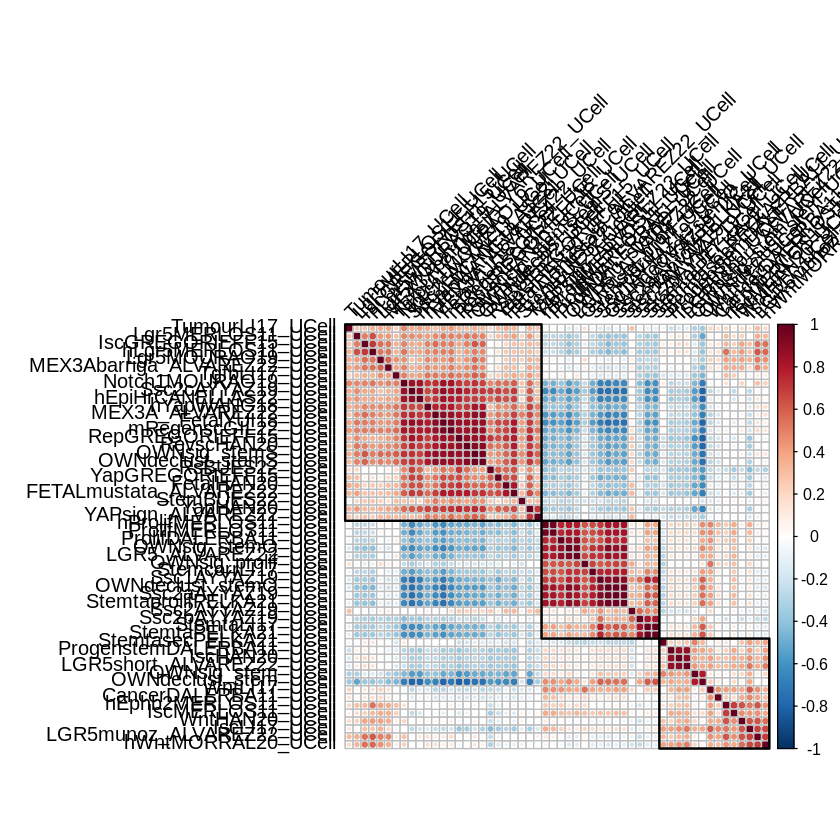

In [7]:
#Compute correlations using the downsampled object

d_corrhtmp <- INTepi@meta.data %>% 
    dplyr::select(
        "curatedCLUST",
        "FetalHAN20_UCell","RevscHAN20_UCell","IscHAN20_UCell",
        "YapHAN20_UCell","WntHAN20_UCell","IscGREGORIEFF15_UCell",
        "RepGREGORIEFF15_UCell","YapGREGORIEFF15_UCell",
        "hEphb2MERLOS11_UCell","hLgr5MERLOS11_UCell",
        "hProlifMERLOS11_UCell","IscMERLOS11_UCell","Lgr5MERLOS11_UCell",
        "ProlifMERLOS11_UCell","FetalYUI18_UCell","Ssc1AYYAZ19_UCell",
        "Ssc2AYYAZ19_UCell","Ssc2aAYYAZ19_UCell","Ssc2bAYYAZ19_UCell",       
        "Ssc2cAYYAZ19_UCell","StemBUES22_UCell","RsBUES22_UCell",
        "Notch1MOURAO19_UCell","Lgr5MOURAO19_UCell","IscLI17_UCell",
        "StemcorrLI17_UCell","TumourLI17_UCell","WntLI17_UCell",
        "TgfbLI17_UCell","StemtaLI17_UCell","ProgenstemDALERBA11_UCell",
        "ImmatureDALERBA11_UCell","CancerDALERBA11_UCell",
        "ProlifDALERBA11_UCell","StemtaPELKA21_UCell",
        "StemtasecPELKA21_UCell","StemtaprolifPELKA21_UCell",
        "OWNwntreceptors_UCell","OWNsig_stem_UCell","OWNsig_stemO_UCell",
        "OWNsig_stemS_UCell","OWNsig_prolif_UCell",
        "OWNdeclust_stem_UCell","OWNdeclust_stemO_UCell","OWNdeclust_stemS_UCell",
        "LGR5munoz_ALVAREZ22_UCell","FETALmustata_ALVAREZ22_UCell",
        "MEX3Abarriga_ALVAREZ22_UCell","LGR5short_ALVAREZ22_UCell",
        "MEX3A_ALVAREZ22_UCell","LGR5_ALVAREZ22_UCell","YAPsign_ALVAREZ22_UCell",
        "hEpiHrCANELLAS22_UCell","hWntMORRAL20_UCell","hYapWANG18_UCell",
        #Revision work starts here
        "hiCMS2_UCell","hiCMS3_UCell",
        "mRegenscGIL22_UCell",
        "hTgfbKEGG_UCell",
        "hKrasGSEA_UCell","hMapkKEGG_UCell","hMapkGO_UCell","hPi3kGO_UCell"
    )

#Compute correlation matrix on stem and TA clusters
d_corrhtmp_stem_filt <- d_corrhtmp %>% 
filter(curatedCLUST %in% 
            c("CSC", "proCSC",
            "revCSC", "TA 1","TA 2")
        ) %>%
dplyr::select(!c( #These signatures show a low SD of correlation values across all cells (<0.24) and thus were removed from the heatmap
        ImmatureDALERBA11_UCell,
        OWNwntreceptors_UCell,
        hKrasGSEA_UCell,
        #These are signalling signatures tht do nhot behave as expected
        hTgfbKEGG_UCell, hMapkKEGG_UCell, hMapkGO_UCell, hPi3kGO_UCell,
        hiCMS2_UCell,hiCMS3_UCell,
        curatedCLUST
        )) %>% 
scale() #Scale correlations

dTest_corrhtmp_stem_filt <- cor.mtest(d_corrhtmp_stem_filt, method = "pearson", conf.level=0.95)
d_corrhtmp_stem_filt <- cor(d_corrhtmp_stem_filt, method = "pearson")
d_corrhtmp_stem_filt

#Plot correlation matrix
corrplot::corrplot(d_corrhtmp_stem_filt, type = "full", 
    order = "hclust", hclust.method = "complete",
    tl.col = "black", tl.srt = 45,
    addrect = 3, rect.col = "black", rect.lwd = 2,
    col = rev(corrplot::COL2("RdBu")),
    p.mat = dTest_corrhtmp_stem_filt$p, sig.level = 0.05, insig = "blank"
    )